In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')   
%matplotlib inline

In [5]:
path = 'train.csv'
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print(f"File not found in {path}. Put file in same notebook folder")
    raise

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [91]:
survival_counts = df['Survived'].value_counts()
survival_percent = df['Survived'].value_counts(normalize=True).mul(100).round(2)

In [33]:
df_clean = df.copy()

In [35]:
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

In [37]:
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

In [39]:
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

In [41]:
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

In [43]:
df_clean['Sex_n'] = df_clean['Sex'].map({'male':0, 'female':1})

In [45]:
df_clean['Deck'] = df_clean['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')

In [47]:
df_clean['Title'] = df_clean['Name'].str.extract(r',\s*([^\.]+)\.')[0].str.strip()

In [49]:
df_clean['Title'] = df_clean['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

In [53]:
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']

In [55]:
df_clean['Title'] = df_clean['Title'].apply(lambda t: 'Rare' if t in rare_titles else t)

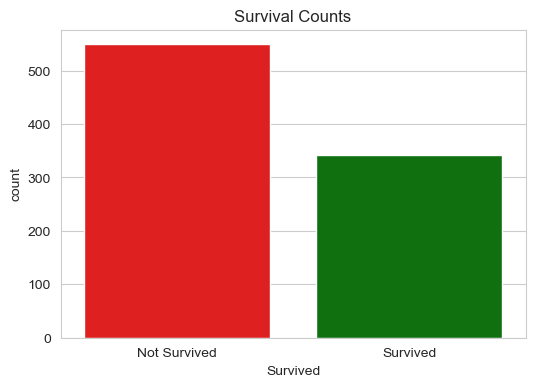

In [161]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Survived',
    data=df_clean,
    hue='Survived',             
    palette={0: "red", 1: "green"},
    dodge=False,              
    legend=False
)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Survival Counts')
plt.show()

**Observation:** Out of 891 passengers, **38%** survived and **62%** did not. This shows a strong class imbalance, which should be considered if building predictive models.

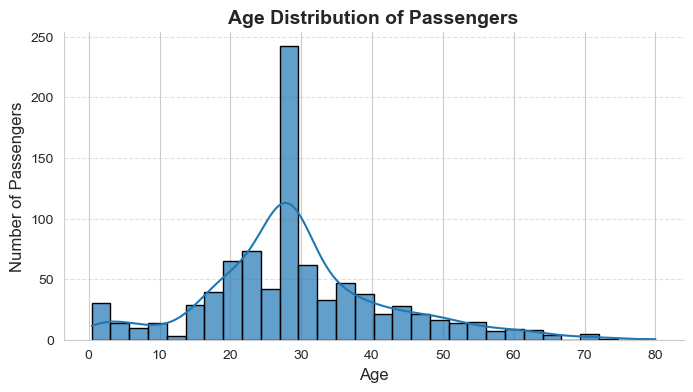

In [191]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_clean,
    x='Age',
    bins=30,
    kde=True,
    color="#1f77b4",          
    edgecolor="black",        
    alpha=0.7                 
)
plt.title('Age Distribution of Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6) 
sns.despine() 
plt.show()

**Observation:** Most passengers were between 20 and 40 years old. There is also a smaller group of children and teenagers, which could influence survival rates.

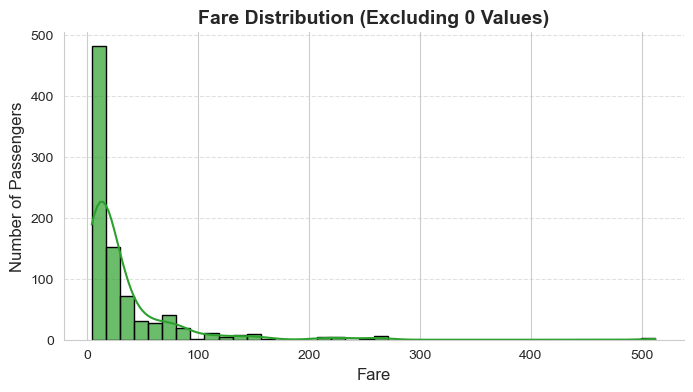

In [193]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_clean,
    x=df_clean['Fare'].replace(0, np.nan).dropna(),
    bins=40,
    kde=True,                     
    color="#2ca02c",              
    edgecolor="black",            
    alpha=0.7                     
)
plt.title('Fare Distribution (Excluding 0 Values)', fontsize=14, fontweight='bold')
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.show()


**Observation:** Around **75%** of passengers paid less than `$50`, while a small group paid above `$200`, indicating premium or 1st Class tickets. The fare distribution is heavily right-skewed.

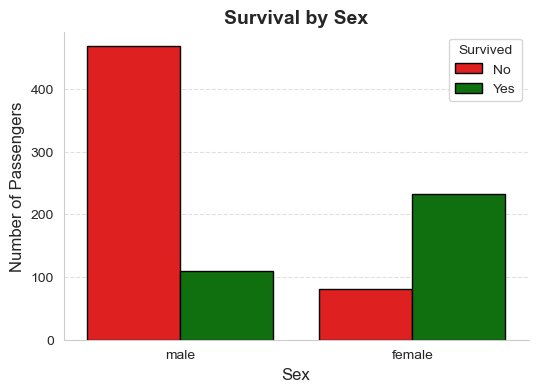

In [195]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Sex',
    hue='Survived',
    data=df_clean,
    palette={0: "red", 1: "green"}, 
    edgecolor="black"
)
plt.title('Survival by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.show()


**Observation:** Females had a survival rate of **74.2%**, compared to only **18.9%** for males. This supports the "women and children first" evacuation policy on the Titanic.

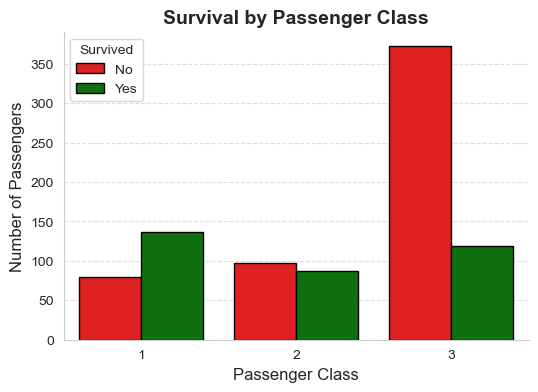

In [197]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Pclass',
    hue='Survived',
    data=df_clean,
    palette={0: "red", 1: "green"},  
    edgecolor="black"
)
plt.title('Survival by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.show()

**Observation:** 1st Class passengers survived at **62.9%**, while 3rd Class passengers survived at only **24.2%**. Higher-class cabins likely provided faster access to lifeboats.

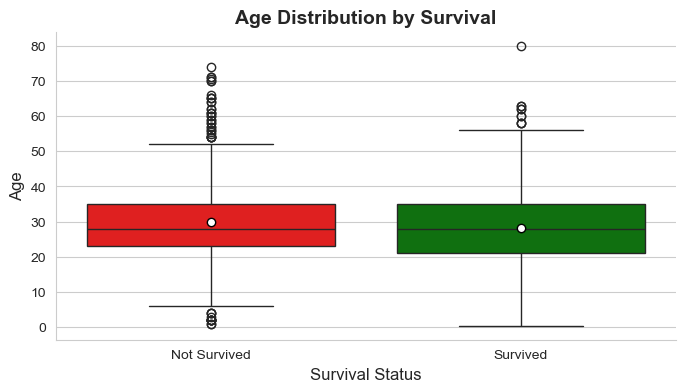

In [199]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='Survived', 
    y='Age', 
    hue='Survived',
    data=df_clean, 
    palette={0: "red", 1: "green"}, 
    showmeans=True, 
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    dodge=False       
)
plt.title('Age Distribution by Survival', fontsize=14, fontweight='bold')
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.legend([],[], frameon=False)  
sns.despine()
plt.show()

**Observation:** Younger passengers, especially children, had higher survival chances. Middle-aged and elderly passengers had lower odds of survival.

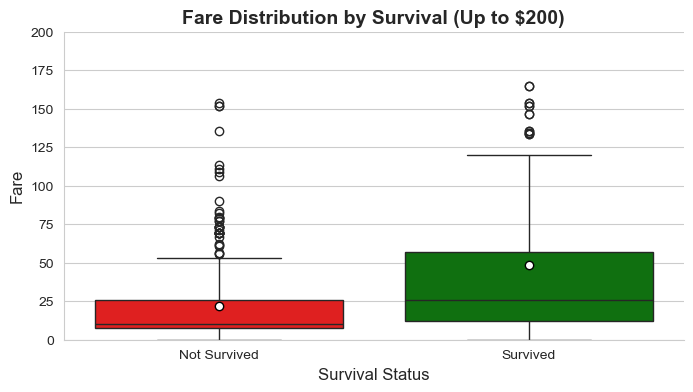

In [201]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='Survived', 
    y='Fare', 
    hue='Survived',                 
    data=df_clean, 
    palette={0: "red", 1: "green"}, 
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    dodge=False                     
)
plt.ylim(0,200)
plt.title('Fare Distribution by Survival (Up to $200)', fontsize=14, fontweight='bold')
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.legend([],[], frameon=False)     
sns.despine()
plt.show()

**Observation:** Survivors generally paid significantly higher fares than non-survivors on average **`$48`** versus **`$22`**. This reinforces the idea that wealthier passengers, likely in higher-class cabins, had better access to lifeboats.

In [135]:
survival_rates = (
    df_clean.groupby('Sex')['Survived']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'Sex': 'Gender', 'Survived': 'Survival Rate (%)'})
    .sort_values(by='Survival Rate (%)', ascending=False)
)

survival_rates

,Gender,Survival Rate (%)
0,female,74.20
1,male,18.89


In [137]:
pclass_survival = (
    df_clean.groupby('Pclass')['Survived']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'Pclass': 'Passenger Class', 'Survived': 'Survival Rate (%)'})
    .sort_values(by='Survival Rate (%)', ascending=False)
)

pclass_survival

,Passenger Class,Survival Rate (%)
0,1,62.96
1,2,47.28
2,3,24.24


In [147]:
title_survival = (
    df_clean.groupby('Title')['Survived']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'Title': 'Passenger Title', 'Survived': 'Survival Rate (%)'})
    .sort_values(by='Survival Rate (%)', ascending=False)
)

title_survival

,Passenger Title,Survival Rate (%)
5,the Countess,100.00
3,Mrs,79.37
1,Miss,70.27
0,Master,57.50
4,Rare,31.82
2,Mr,15.67


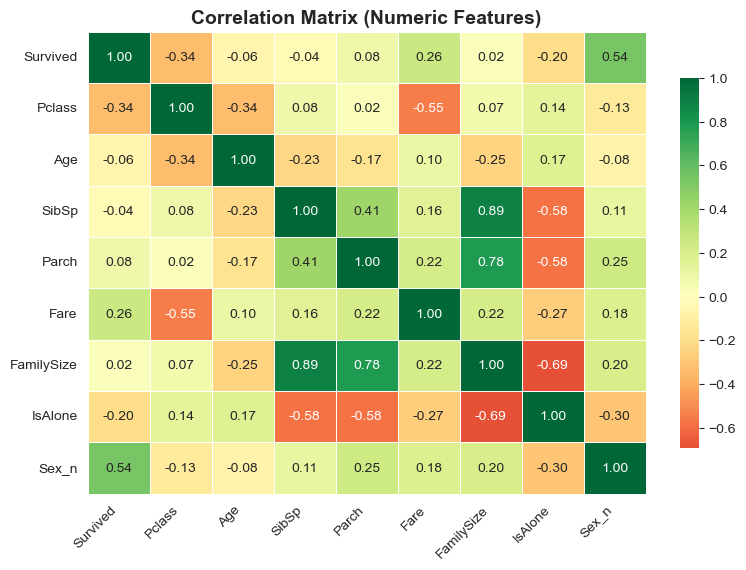

In [203]:
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize','IsAlone','Sex_n']
num_cols = [c for c in num_cols if c in df_clean.columns]

plt.figure(figsize=(9,6))
corr_matrix = df_clean[num_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,             
    fmt='.2f',              
    cmap='RdYlGn',           
    center=0,                
    linewidths=0.5,           
    annot_kws={"size": 10},  
    cbar_kws={'shrink': 0.8} 
)

plt.title('Correlation Matrix (Numeric Features)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


**Observation:** Survival is positively correlated with being female (`Sex_n = 1`, correlation 0.54) and with fare (0.26). It is negatively correlated with passenger class (-0.34) and traveling alone (-0.20). These correlations align with earlier visual findings.

## Executive Summary

- **Gender Effect:** Females had a much higher survival rate (**74.2%**) compared to males (**18.9%**), likely due to "women and children first" evacuation protocols.
- **Class Effect:** 1st Class passengers survived at **62.9%**, while 3rd Class survival was only **24.2%**,showing that higher-class cabins had better lifeboat access.
- **Age Effect:** Children and younger passengers had higher survival chances, while middle-aged passengers had lower odds.
- **Fare Effect:** Survivors generally paid much higher fares on average **`~$48`** compared to **`~$22`** for non-survivors.This notable gap suggests a socio-economic survival advantage.
- **Travel Group Effect:** Passengers traveling with family had slightly better survival rates than those traveling alone, supported by the negative correlation of **-0.20** for the `IsAlone` feature.
- **Correlation Insights:** Survival is positively correlated with being female (`Sex_n = 1`, **0.54**) and with fare (**0.26**),and negatively correlated with passenger class (**-0.34**) and traveling alone (**-0.20**).

**Conclusion:** The analysis confirms that socio-economic status,gender,age,and travel group size were key factors influencing survival on the Titanic, with wealth and cabin class playing a major role.